# Section 3:  Haar Cascade Classifier Parameter Exploration

## Step 1: Import the modules

In [1]:
import cv2
import matplotlib.pyplot as plt

## Step 2: Load the face detection trained model

In [2]:
face_cascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")

## Step 3: Read and convert the image

In [3]:
img = cv2.imread("img/test2.jpg")
if img is None:
    raise FileNotFoundError("img/sample.jpg not found. Make sure the image exists in the 'img' folder.")
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

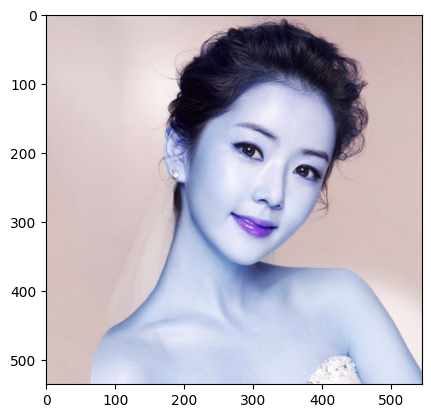

In [4]:
plt.imshow(img)
img_copy1 = img.copy()
img_copy2 = img.copy()
img_copy3 = img.copy()

In [5]:
# Reading in the image and creating copies
img = cv2.imread('img/train5.jpg')
img = cv2.resize(img, (240, 240), interpolation=cv2.INTER_CUBIC)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)   # convert BGR (cv2) to RGB

## Step 4: Define detect_face function

In [6]:
def detect_face(img):
    face_img = img.copy()
    face_rect = face_cascade.detectMultiScale(face_img,
                                              scaleFactor = 1.1,
                                              minNeighbors = 5)

    for (x, y, w, h) in face_rect:
        # red box for face
        cv2.rectangle(face_img, (x, y),
                      (x + w, y + h), (0, 255, 0), 1)
    return face_img

## Step 5: Invoke function and display image

True

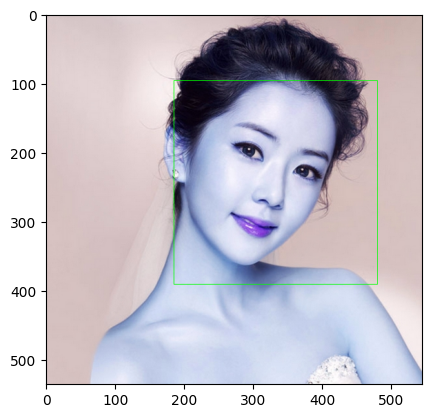

In [7]:
face = detect_face(img_copy1)
plt.imshow(face)
cv2.imwrite('face.jpg', face)

## Step 6: Load the eye detection trained model

In [8]:
eye_cascade = cv2.CascadeClassifier("haarcascade_eye.xml")

## Step 7: Define detect_eyes function

In [9]:
# create a function to detect eyes
def detect_eyes(img):
    eye_img = img.copy()
    height, width, channels = eye_img.shape
    
    eye_rect = eye_cascade.detectMultiScale(eye_img,
                                            scaleFactor = 1.1,
                                            minNeighbors = 8,
                                            minSize=(int(width * 0.15), int(height * 0.15)))

    for (x, y, w, h) in eye_rect:
        # green box for eyes
        cv2.rectangle(eye_img, (x, y),
                      (x + w, y + h), (255, 0, 0), 1)
    return eye_img

## Step 8: Invoke function and display image

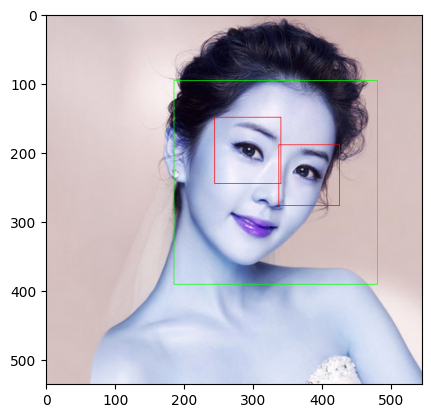

In [10]:
# combine face and eye detection
eyes_face = detect_face(img_copy3)
eyes_face = detect_eyes(eyes_face)
plt.imshow(eyes_face)